In [174]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)

In [175]:
def sigmoid(xin):
    return 1 / (1 + np.exp(-xin))

In [176]:
def sigmoid_derivative(sxin):
    return sxin * (1 - sxin)

In [177]:
def eval(input, weights):
    return (sigmoid(np.dot(input, weights)))

In [178]:
def train(inputs, outputs, weights, niter=500, lr=0.2):
    error_log = np.zeros(niter, dtype=float)
    for iter in range(niter):
        out = eval(inputs, weights)
        err = out - outputs
        error_log[iter] = np.dot(err.T, err).item()
        dw = np.dot(inputs.T, err*sigmoid_derivative(out))
        weights -= lr * dw
    return error_log
        

In [179]:
def sim(train_inputs, train_outputs, weights0, rates):

    for rate in rates:
        out0 = eval(train_inputs, weights0)
        print("Initial output:", out0.T)

        errs = train(train_inputs, train_outputs, weights0, lr=rate)

        out2 = eval(train_inputs, weights0)
        print("Final output:", out2.T)

        print("Expected output:", train_outputs.T)

        plt.figure()
        plt.plot(errs)
        plt.title(f"Single Neuron Training, Learning Rate = {rate}")
        plt.xlabel("Iterations")
        plt.ylabel("Error for all training instances")
        plt.show()




Initial output: [[0.66386241 0.84278237 0.86373227 0.62550732 0.7276255 ]]
Final output: [[0.01127926 0.89531963 0.70511583 0.03920501 0.55458921]]
Expected output: [[0.  1.  0.7 0.  0.5]]


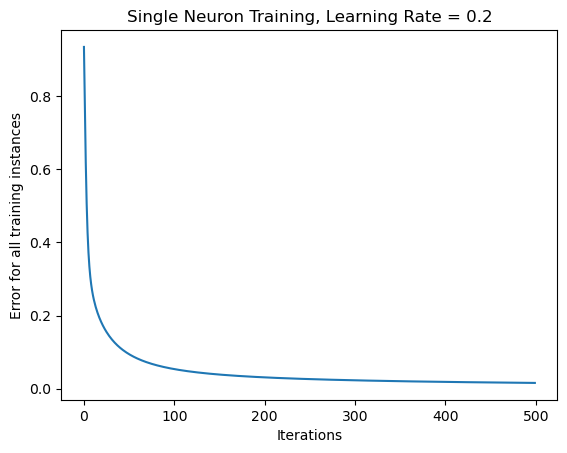

Initial output: [[0.01127926 0.89531963 0.70511583 0.03920501 0.55458921]]
Final output: [[0.00252535 0.92652402 0.70363516 0.01326813 0.52727246]]
Expected output: [[0.  1.  0.7 0.  0.5]]


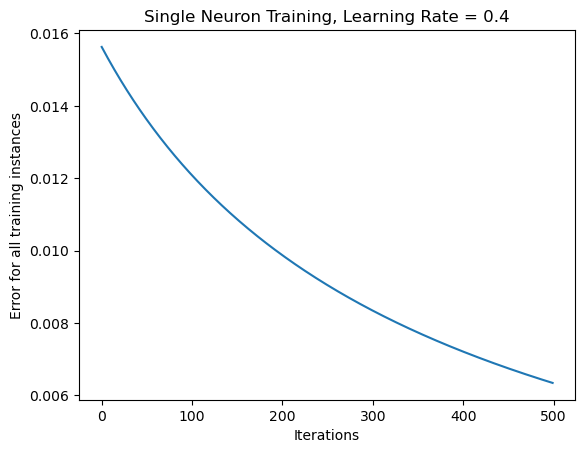

Initial output: [[0.00252535 0.92652402 0.70363516 0.01326813 0.52727246]]
Final output: [[8.24688995e-04 9.45618043e-01 7.02133757e-01 6.05166210e-03
  5.15122108e-01]]
Expected output: [[0.  1.  0.7 0.  0.5]]


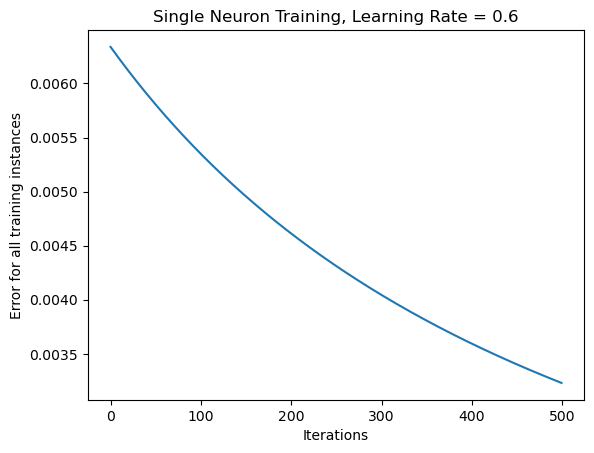

In [180]:
weights0 = np.random.random((3,1))
train_inputs = np.array([[0, 0, 3], [2, 1, 0], [2, 0, 2], [0, 1, 1], [1, 1, 0]])
train_outputs = np.array([[0, 1, 0.7, 0, 0.5]]).T
rates = [0.2, 0.4, 0.6]
sim(train_inputs, train_outputs, weights0, rates)
